In [2]:
# import data manipulation mmodules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
os.chdir(r"C:\Users\christopher\Desktop\hacker_earth")
df_train=pd.read_csv('train.csv')
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [3]:
df_train.sort_values(by=['issue_date']).head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
1499,ANSL_69711,1994-12-23 00:00:00,2017-01-11 13:46:00,NaN,Lilac Point,0.65,40.07,0,7,2.0,1
8572,ANSL_68753,1995-06-23 00:00:00,2017-07-13 15:48:00,0.0,Tortie,0.62,18.78,0,7,1.0,1
1151,ANSL_52377,1997-06-10 00:00:00,2017-07-07 12:47:00,0.0,White,0.61,12.79,13,9,1.0,1
3284,ANSL_60566,1998-02-03 00:00:00,2018-02-24 11:41:00,0.0,White,0.02,14.38,0,7,1.0,2
5127,ANSL_51478,1998-03-03 00:00:00,2018-03-26 00:00:00,2.0,White,0.30,27.72,13,9,0.0,0


In [5]:
df_train.groupby(['condition', 'breed_category']).size().to_frame()

0
condition breed_category      
0.0       1.0             6281
1.0       0.0             6819
2.0       0.0             2181
          1.0             2076

In [6]:
print(df_train['color_type'].value_counts()[1:10])

White            2453
Brown            1791
Brown Tabby      1687
Tan              1349
Blue              852
Orange Tabby      791
Red               526
Brown Brindle     496
Tricolor          469
Name: color_type, dtype: int64


Text(0.5,1,'Box plot to see how different pet categories differ in length')

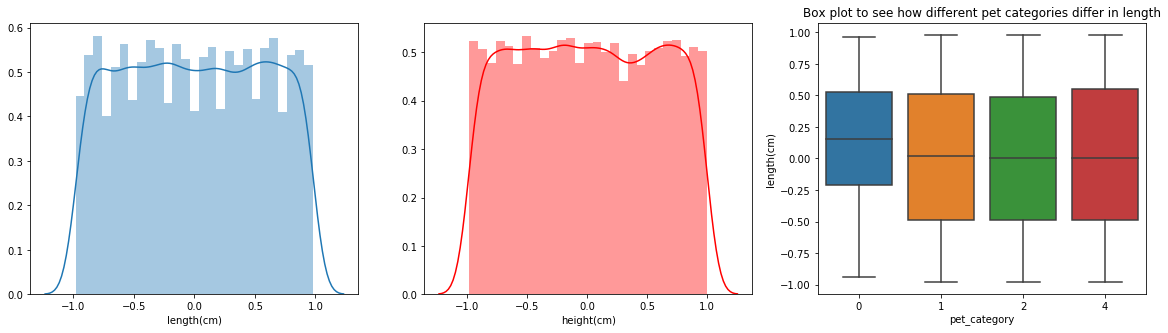

In [46]:
# #convert length(m) to length(cm)
df_train['length(cm)'] =df_train['length(m)'].apply(lambda x: x*100)
df_train.drop('length(m)',axis=1,inplace=True)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df_train['length(cm)'])
plt.subplot(1,3,2)
sns.distplot(df_train['height(cm)'],color='red')
plt.subplot(1,3,3)
sns.boxplot(x='pet_category',y='length(cm)',data=df_train)
plt.title('Box plot to see how different pet categories differ in length')

In [14]:
#new feature
df_train['ratio_len_height'] =df_train['length(cm)']/df_train['height(cm)']
df_train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,80.0,10.282776
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,72.0,5.073996


In [ ]:
## some basic notes : column condition has missing values , the dates columns may be helpfull in feature enginering 
#### : the x1 and x2 columns are anonymous and so we do not know their data types so we will asssume they are numerical at first but shall revisit

### EDA 

##### 1.impute missing values 

In [19]:
df_train_transformed=pd.read_csv('train_transformed.csv')
# I used knn imputation but since I do not have it as a module in my sckiktit learn I implemented it elsewhere
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X)
df_train['condition']=df_train_transformed['condition']
df_train['condition'].isnull().sum()

0

In [20]:
print(set(df_train['breed_category']),"breeds presenst in the train and ","  ",set(df_train['pet_category']),'pet categories')

{0.0, 1.0, 2.0} breeds presenst in the train and     {0, 1, 2, 4} pet categories


#### 2. outlier handling 

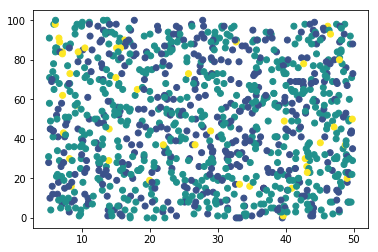

In [21]:
plt.scatter(df_train['height(cm)'][1:1000],df_train['length(cm)'][1:1000],c=df_train['pet_category'][1:1000])
# the data is all over the place and so does not provide any viable estimates unless a transformation is applied 

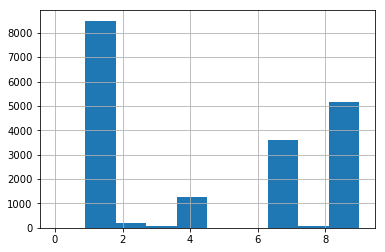

In [22]:
df_train['X2'].hist() # this will need some transformation

#### scaling the features that should be scaled 

In [23]:
x=df_train[['length(cm)','height(cm)','X1','X2']]
x.head()

,length(cm),height(cm),X1,X2
0,80.0,7.78,13,9
1,72.0,14.19,13,9
2,15.0,40.90,15,4
3,62.0,17.82,0,1
4,50.0,11.06,18,4


In [24]:
from sklearn.preprocessing import RobustScaler,StandardScaler # robust scaler has advanatge of being able to handle outliers 
robust=RobustScaler()
X=robust.fit_transform(x)
print(X.shape)
final_data=pd.DataFrame(X)
print(final_data.shape)

(18834, 4)
(18834, 4)


In [25]:

df_train[['length(cm)','height(cm)','X1','X2']]=final_data[[0,1,2,3]]
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,-0.861010,1.000000,0.625,0.0,1,0.588235,10.282776
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,-0.578849,1.000000,0.625,0.0,2,0.431373,5.073996
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,2,Brown,0.596897,1.153846,0.000,2.0,4,-0.686275,0.366748
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,-0.419060,0.000000,-0.375,0.0,2,0.235294,3.479237
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,-0.716628,1.384615,0.000,0.0,1,0.000000,4.520796


#### Handling categorical features 

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
df_train['color_type']=label.fit_transform(df_train['color_type'])
df_train.head()

# well have to label encode the pet_category as it is zero 
# df_train['pet_category']=label.fit_transform(df_train['pet_category'])

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2,18,-0.861010,1.000000,0.625,0.0,1,0.588235,10.282776
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1,53,-0.578849,1.000000,0.625,0.0,2,0.431373,5.073996
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,2,15,0.596897,1.153846,0.000,2.0,4,-0.686275,0.366748
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1,53,-0.419060,0.000000,-0.375,0.0,2,0.235294,3.479237
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2,2,-0.716628,1.384615,0.000,0.0,1,0.000000,4.520796


In [38]:
X=df_train[['condition', 'color_type','X1', 'X2','ratio_len_height']]
y1 = df_train['breed_category']
y2 = df_train['pet_category']
X_breed=pd.concat([X,y2],axis=1) # decided to use pet category to predict breed but the other way around no 
print(X.shape,X_breed.shape,y1.shape,y2.shape)

(18834, 6) (18834, 7) (18834,) (18834,)


#### checkin on the distribution of our target variables 
If there is class imbalance using synthetic data generation techniquies would be advisable 

Text(0.5,1,'pet_category')

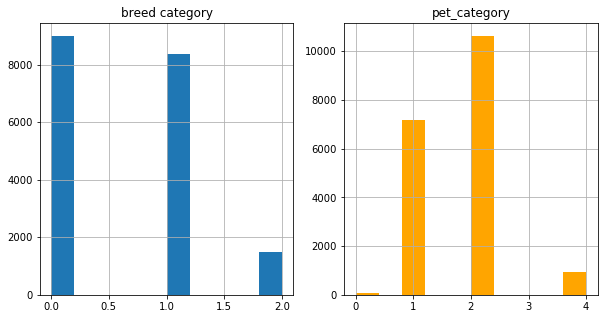

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
y1.hist()
plt.title('breed category')
plt.subplot(1,2,2)
y2.hist(color='orange')
plt.title('pet_category')

In [ ]:
# yeah looks like we will consider class imbalance handling for better unbiased results : smote , upsampling : rose and all that would be necessary 


## SMOTE
S𝒚𝒏𝒕𝒉𝒆𝒕𝒊𝒄 𝒎𝒊𝒏𝒐𝒓𝒊𝒕𝒚 𝒐𝒗𝒆𝒓𝒔𝒂𝒎𝒑𝒍𝒊𝒏𝒈 𝒕𝒆𝒄𝒉𝒏𝒊𝒒𝒖𝒆- creates examples of the minority class by looking at the distribution of the minority class and "guesses" what the other cases would have been 
- pick two points that are relatively closer to each other distance wise 
-  draw a line 
- generate a new point along that line 

It doesn't always work but a lot of time it works and it is a good technique to look at when there is no way of generating more data and the aforementioned techniques are not applicable per se 
It is better for increasing precision(𝙥𝙤𝙨𝙞𝙩𝙞𝙫𝙚 𝙞𝙙𝙚𝙣𝙩𝙞𝙛𝙞𝙚𝙙 𝙖𝙨 𝒕𝒉𝒂𝒕 𝒂𝒓𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆 ) but this comes at the cost of recall (𝒐𝒖𝒕 𝒐𝒇 𝒂𝒍𝒍 𝒕𝒉𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆𝒔 𝒘𝒉𝒊𝒄𝒉 𝒐𝒏𝒆𝒔 𝒉𝒂𝒗𝒆 𝒃𝒆𝒆𝒏 𝒄𝒐𝒓𝒓𝒆𝒄𝒕𝒍𝒚 𝒊𝒅𝒆𝒏𝒕𝒊𝒇𝒊𝒆𝒅)


In [1]:
! pip install imblearn

  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
X_res_1, y_res_1=smote_sample.fit_sample(X_breed,y1)
X_res_2,y_res_2=smote_sample.fit_sample(X,y2)

Text(0.5,1,'pet_category_resampled')

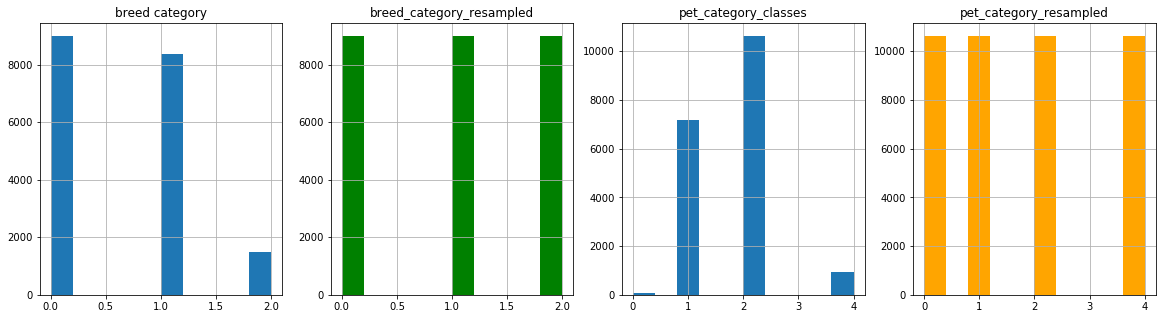

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
y1.hist()
plt.title('breed category')
plt.subplot(1,4,2)
y_res_1.hist(color='green')
plt.title('breed_category_resampled')
plt.subplot(1,4,3)
y2.hist()
plt.title('pet_category_classes')
plt.subplot(1,4,4)
y_res_2.hist(color='orange')
plt.title('pet_category_resampled')

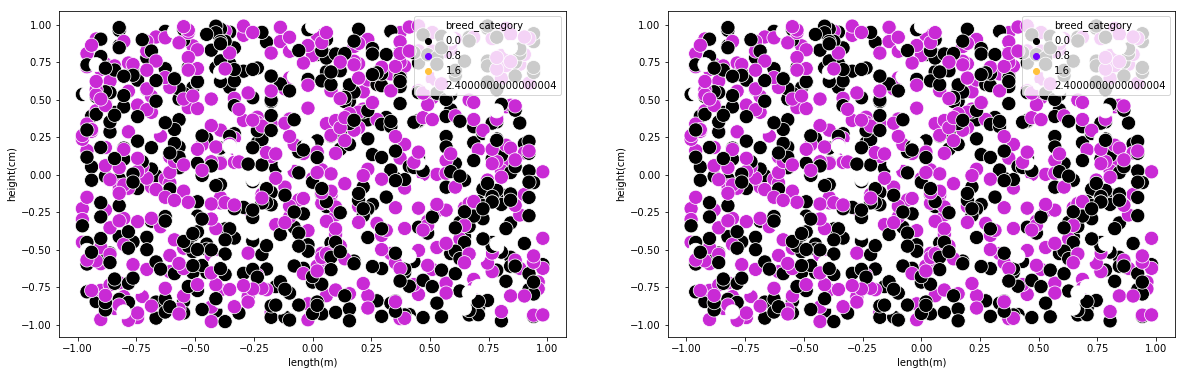

In [63]:
# plt.figure(figsize=(20,6))
# plt.subplot(1,2,1)
# sns.scatterplot(x=X['length(cm)'][1:1001],y=X['height(cm)'][1:1001],hue=y1,s=200,palette='gnuplot2')
# plt.subplot(1,2,2)
# sns.scatterplot(x=X['length(cm)'][1:1001],y=X['height(cm)'][1:1001],hue=y_res,s=200,palette='gnuplot2')

In [36]:
print(X_res_1.shape,X.shape)

(27000, 7) (18834, 7)


# Model selection

In [42]:
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [43]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('SVC', SVC(kernel = 'rbf', random_state = 0)))
models.append(('LR', LogisticRegression(random_state = 0)))
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)))
models.append(('GB', GradientBoostingClassifier()))  
models.append(('xgb',xgb.XGBClassifier()))

### Predicting breed category

In [44]:
# from sklearn.metrics import  make_scorer,f1_score
# scoring=make_scorer(f1_score,average='weighted')

# from sklearn import metrics
# sorted(metrics.SCORERS.keys()) to see supported scoring metrics


import warnings
warnings.filterwarnings("ignore")

names = []
scores = []
scores_balanced=[]
for name,model in models:
    score = cross_val_score(model, X_breed, y1, cv=5, scoring='f1_weighted')
    score_bal=cross_val_score(model, X_res_1, y_res_1, cv=5, scoring='f1_weighted')
    scores_balanced.append(score_bal.max()) # we store the cv scores for the balanced dataset
    scores.append(score.max())
    names.append(name)

cv_score_imbalance = pd.DataFrame({'Name': names, 'Score': scores,'Score_balanced':scores_balanced})
cv_score_imbalance

,Name,Score,Score_balanced
0,KNN,0.846917,0.869311
1,SVC,0.846361,0.776660
2,LR,0.780428,0.737692
3,DT,0.849518,0.871483
4,GNB,0.841518,0.806550
5,RF,0.863513,0.888212
6,GB,0.866460,0.868642
7,xgb,0.863897,0.893513


### predicting pet category 

In [82]:
names_pet = []
scores_pet = []
scores_bal_pet=[]
for name,model in models:
    score = cross_val_score(model, X, y2, cv=5, scoring='f1_weighted')
    scores_pet.append(score.max())
    score_bal_pet=cross_val_score(model, X_res_2, y_res_2, cv=5, scoring='f1_weighted')
    scores_bal_pet.append(score_bal_pet.max())
    names_pet.append(name)

cv_score_pet = pd.DataFrame({'Name': names_pet, 'Score': scores_pet,'score_bal':scores_bal_pet})
cv_score_pet

,Name,Score,score_bal
0,KNN,0.841132,0.891447
1,SVC,0.648966,0.571288
2,LR,0.653145,0.533569
3,DT,0.830480,0.893619
4,GNB,0.641451,0.569399
5,RF,0.828263,0.900253
6,GB,0.870800,0.836839
7,xgb,0.869765,0.907251


XGBoost is one of the implementations of Gradient Boosting concept, but what makes XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, which gives it better performance,” according to the author of the algorithm, Tianqi Chen

In [ ]:

# GBM Classifier explained

'''params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble. GradientBoostingClassifier(**params)
n_estimators : int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance.
max_depth: integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. The best value depends on the interaction of the input variables.
subsample: float, optional (default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:

In [47]:
from sklearn import metrics
model =xgb.XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='multi:softmax', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
# model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
X_train, X_test, y_train, y_test = train_test_split( X_res_1,y_res_1, test_size=0.3, random_state=4) # we now use the resampled datasets 
y_pred=model.fit(X_train,y_train).predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred,y_test))
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
 [[2325  286  191]
 [ 117 2228  117]
 [ 229  241 2366]]
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      2671
         1.0       0.90      0.81      0.85      2755
         2.0       0.83      0.88      0.86      2674

    accuracy                           0.85      8100
   macro avg       0.86      0.85      0.85      8100
weighted avg       0.86      0.85      0.85      8100



In [125]:
print(set(y_test),set(y_pred))

{0.0, 1.0, 2.0} {0.0, 1.0, 2.0}


In [113]:
# y2=y2.map(lambda x:float(x))

In [48]:
metrics.f1_score(y_pred,y_test,average='weighted')

0.8542078136916217

## Hyperameter optimization and feature selection

<Figure size 1440x720 with 0 Axes>

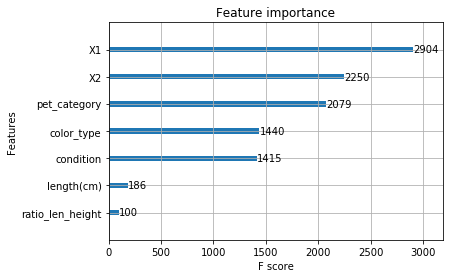

In [49]:
plt.figure(figsize=(20,10))
xgb.plot_importance(model)
plt.show()

In [128]:
# using xgboost for feature selection
from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
    if thresh>0:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model =xgb.XGBClassifier()
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = metrics.f1_score(y_test, predictions,average='weighted',labels=np.unique(y_pred))
        print("Thresh=%.3f, n=%d,f_1_score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.006, n=6,f_1_score: 85.09%
Thresh=0.006, n=5,f_1_score: 85.86%
Thresh=0.039, n=4,f_1_score: 86.21%
Thresh=0.074, n=3,f_1_score: 85.44%
Thresh=0.093, n=2,f_1_score: 84.87%
Thresh=0.782, n=1,f_1_score: 84.68%


In [129]:
# select features using threshold
selection = SelectFromModel(model, threshold=0.039, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = xgb.XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
f_score = metrics.f1_score(y_test, y_pred,average='weighted')
f_score

0.8620562129780994

## Tuning (it is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance improvement with the latter is always only marginal)

> Optimize **max_depth parameter**. It represents the depth of each tree, which is the maximum number of different features used in each tree. I recommend going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. This will help simplify your model and avoid overfitting

> Now play around with the learning rate and the features that avoids overfitting:

> **learning_rate**: usually between 0.1 and 0.01. If you’re focused on performance and have time in front of you, decrease incrementally the learning rate while increasing the number of trees.

> **subsample**, which is for each tree the % of rows taken to build the tree. I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.

> **colsample_bytree**: number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.

> **gamma**: usually misunderstood parameter, it acts as a regularization parameter. Either 0, 1 or 5.

It also always advisable to look at the feature importance graphs 

In [133]:
estimator = xgb.XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)
parameters = {'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01,0.05],
    'subsample':[0.8,0.85,0.9,1],
    'colsample_bytree':[0.4,0.5,0.6]}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1_weighted',
    n_jobs = 5,
    cv = 2,
    verbose=True
)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 1152 candidates, totalling 2304 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   40.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.8min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  8.7min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 16.0min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 25.7min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 38.7min
[Parallel(n_jobs=5)]: Done 2304 out of 2304 | elapsed: 50.5min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=60, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=42, subsample=0.85,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
model_breed=xgb.XGBClassifier(**grid_search.best_params_) # using a tuned model it is fairly easy to update the parameters 
y_pred=model_breed.fit(X_train,y_train).predict(X_test)
f1_score(y_pred,y_test,average='weighted')
# so essentially using the default parameters is sufficient and tuning is not that much necessary 


0.8648271779763457

# Predicting pet category 

In [50]:
from sklearn.ensemble import RandomForestClassifier
#making the instance  for random forest 
# RF Classifier explained
'''rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
n_estimators : integer, optional (default=10)
The number of trees in the forest.
oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs : integer, optional (default=1)
The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
'''
model_ran=RandomForestClassifier(n_jobs=-1,random_state=123,n_estimators=1000)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res_2,y_res_2, test_size=0.3, random_state=4)
model_ran.fit(X_train1,y_train1)
#Prediction
prediction=model_ran.predict(X_test1)
#importing the metrics module

#evaluation(Accuracy)
print("F_score",metrics.f1_score(prediction,y_test1,average='weighted'))
print(metrics.confusion_matrix(prediction,y_test1))
print(metrics.classification_report(y_test1,prediction))

F_score 0.8947426032285178
[[3101   40   32   52]
 [   7 2618  457   53]
 [  19  420 2704  103]
 [  16   53   93 2978]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3143
           1       0.84      0.84      0.84      3131
           2       0.83      0.82      0.83      3286
           4       0.95      0.93      0.94      3186

    accuracy                           0.89     12746
   macro avg       0.89      0.90      0.89     12746
weighted avg       0.89      0.89      0.89     12746



In [ ]:
# Tuning random forest classifier for best results 


#### Predicting the pet category with XGB instead

## Preprocessing the test data for prediction

In [51]:
df_test=pd.read_csv('test.csv')
df_test_transformed=pd.read_csv('df_test_transformed.csv')
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [52]:
#imputation
df_test['condition']=df_test_transformed['condition']
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
pet_id          8072 non-null object
issue_date      8072 non-null object
listing_date    8072 non-null object
condition       8072 non-null int64
color_type      8072 non-null object
length(m)       8072 non-null float64
height(cm)      8072 non-null float64
X1              8072 non-null int64
X2              8072 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 567.6+ KB


In [53]:
df_test['length(cm)'] =df_test['length(m)'].apply(lambda x: x*100)
df_test.drop('length(m)',axis=1,inplace=True)
#new feature
df_test['ratio_len_height'] =df_test['length(cm)']/df_test['height(cm)']

In [54]:
# scaling 
test_x=df_test[['length(cm)','height(cm)','X1','X2']]
test_X=robust.fit_transform(test_x)
test_X_frame=pd.DataFrame(test_X)
df_test[['length(cm)','height(cm)','X1','X2']]=test_X_frame[[0,1,2,3]]
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm),ratio_len_height
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0,Black,0.690012,0.000000,0.375,0.72,2.036040
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1,Orange Tabby,-0.932327,0.000000,-0.375,-0.90,0.894188
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1,Black,0.621552,0.000000,0.375,-0.54,0.582383
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1,Black,-0.853507,0.538462,-0.375,-0.44,3.427896
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1,Brown,0.158090,0.000000,0.375,0.40,2.296248


In [63]:
## label encoding 
df_test['color_type']=label.fit_transform(df_test['color_type'])
Y=df_test[['condition', 'color_type', 'X1', 'X2','ratio_len_height']]
Y.head()

,condition,color_type,X1,X2,ratio_len_height
0,0,2,0.000000,0.375,2.036040
1,1,36,0.000000,-0.375,0.894188
2,1,2,0.000000,0.375,0.582383
3,1,2,0.538462,-0.375,3.427896
4,1,14,0.000000,0.375,2.296248


##### predict pet _category first then predict breed 

In [57]:
pet=model_ran.fit(X_res_2,y_res_2).predict(Y)
set(pet)

{0, 1, 2, 4}

In [58]:
Y['pet_category']=pet
Y.head()

,condition,color_type,length(cm),X1,X2,ratio_len_height,pet_category
0,0,2,0.72,0.000000,0.375,2.036040,2
1,1,36,-0.90,0.000000,-0.375,0.894188,1
2,1,2,-0.54,0.000000,0.375,0.582383,2
3,1,2,-0.44,0.538462,-0.375,3.427896,2
4,1,14,0.40,0.000000,0.375,2.296248,2


In [59]:
# model_breed=xgb.XGBClassifier(**grid_search.best_params_) # fitting with updated parameters 
model_breed=xgb.XGBClassifier()
breed=model_breed.fit(X_res_1,y_res_1).predict(Y)
set(breed)

{0.0, 1.0, 2.0}

##### predicting pet_cat

In [60]:
# pet=model_ran.fit(X_res_2,y_res_2).predict(Y)
# set(pet)
df_pet=pd.DataFrame(pet)
df_pet.columns=['pet_cats']
df_pet['pet_cats'].value_counts()

2    4485
1    3119
4     393
0      75
Name: pet_cats, dtype: int64

In [61]:
submission=pd.DataFrame({'pet_id':df_test['pet_id'],
                        'breed_category':breed,
                       'pet_category':pet})
submission.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [62]:
submission.to_csv('pet_pred_new.csv',index=False)